# 2D Phase Portraits and Eigenvalues

## An overview of the complex behaviors of 2D ODE systems

# Our current applied math toolbox

To date, we have covered:

- Basic **Python** coding
- Understanding the dynamics of 1st order ODEs using **Flow on a line**
    - Take-away: 1st order systems can only asymptotically approach a steadystate or explore away from a steadystate
    - Cannot oscillate or move in more than 1 direction
- And while 1st order ODEs are boring, we used **bifurcation** diagrams to understand how changing a parameter can lead to pretty drastic changes in a 1st order ODE's behavior

# Today: 2D systems and the complex behaviors possible

- Will give demonstrations of some of the possible responses
- Will show that linear 2D systems can achieve some very complex responses
    - Of course nonlinear systems will achieve more
- Then will come back to stability analysis
    - Will use phase portraits first to appreciate how complex the idea of stability now is
    - And then jump into the always scary EIGENVALUES!

# Phase Portraits

- Flow was great for 1D or 1st order systems, but also is limited to 1D
- Phase portraits are similar conceptually to flow
- In a phase portrait, you plot the two state variables on the x and y axis
- Then, you create a grid across the portrait and for each combination of x and y values, calculate the value of the derivatives to get the change in x and y directions.
- With the change in x and y in hand, you typically plot arrors to indicate the direction of movement and the speed/magnitude.

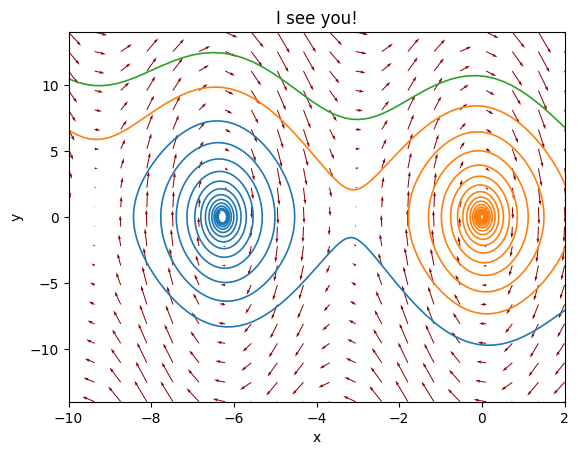

In [1]:
# Use code below to install plotdf
# !pip install plotdf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from math import sin
from plotdf import plotdf
  
def f(x,g=1,l=1,m=1,b=1):
    return np.array([x[1],-g*sin(x[0])/l-b*x[1]/m/l])

plotdf(f, # Function giving the rhs of the diff. eq. system
     np.array([-10,2]), # [xmin,xmax]
     np.array([-14,14]),# [ymin,ymax]
     [(1.05,-9),(0,5),(-9,10)], # list of initial values for trajectories (optional)
     # Additional parameters for `f` (optional)
     parameters={"g":9.8,"l":0.5,"m":0.3,"b":0.05},
     gridsteps=20,
     nsteps = 1000,
      tmax=20)

plt.xlabel("x")
plt.ylabel("y")
plt.title("I see you!");
# help(plotdf) # UNCOMMENT FOR MORE COMMAND OPTIONS

# Comments on example phase portrait

- They allow us to visualize how solutions from multiple initial conditions will evolve.
- Can very clearly characterize the complex dynamical landscape
- Downsides can be
    - they may take some time to generate
    - unless done with fine resolution, will not always be clear where the stable and unstable steadystates are
        - For example, our plot above has at least 3 steadystates, though only 2 are obvious
- Often useful to use an optimization algorithm to find the roots of the ODE functions (i.e. the steadystates) first and then develop the plots
- Before diving deeper into phase portraits, stability, etc, let's look at what type of responses are possible.

# Responses of LINEAR 2D system

Images collected from Strogatz chapter 5. Some of these your coded in Homework 3!

<img src = "images/linear_2d.png" width = "500">

# Responses of LINEAR 2D system

1. Stable steady state where solutions from all initial conditions asymptotically approach a steadystate (A-C)
2. An unstable steadystate where solutions may approach from one side but are repelled from a competing direction (D)
3. Can have "centers" or orbits where the solution oscillates for all time (E)
4. And lastly stable and unstable spirals (F)

# Responses of NONLINEAR 2D systems: multiple steadystates

We can see that linear 2nd order systems can have diverse responses. And obviously nonlinear systems will have more!Here is a phase portrait of the Lotka-Volterra Model for Competition between sheep and rabbits. The equations are:
\begin{align}
\dot{x} = x(3-x-2y)\\
\dot{y} = y(2-x-y)\\
\end{align}

where x is the population of sheep and y is population of rabbits. Depending on the ratio of rabbits to sheep, we will eventually evolve to only a population of sheep or only a population of rabbits. Img from Strogatz Chapt 6

<img src = "images/nonlinear phase portrait 1.jpg" width = "500">


# Responses of NONLINEAR 2D systems: limit cycles

And while linear 2D systems can have orbits and stable/unstable spirals, nonlinear 2D systems can show a different oscillatory behavior: limit cycles. Img from Strogatz Chapt 6

A limit cycle can be seen in the area of D below. A limit cycle differs from orbits in that a solution can evolve to eventually fall onto a continuous cycle. And it differs from spirals as spirals either oscillate to a steadystate or explode. For a steady limit cycle, if the system is perturbed slightly, it will always return to the standard cycle.

<img src = "images/nonlinear phase portrait 2.jpg" width = "500">

# Linear and Nonlinear 2 D systems have been successful for modeling many many processes

- Limit Cycles (nonlinear)
    - beating of a heart
    - circadian rhythms (changes in body temp or hormones)
    - oscillatory chemical reactions, i.e. the Brusselator
    - self excited oscillations in bridges and airplane wings (think the video of the bridge jumping up and down)
- Multiple Steadystates (nonlinear)
    - again, chemical reactions
    - species competition models
    - two-state models of chemostats (i.e. bioreactors)
- Linear 2nd order systems
    - simple harmonic oscillators (weight on a spring with no friction)
    - again, chemical reactions
    - relationships (example in Strogatz)

# Beyond phase portraits and general behaviors, what else should we learn about 2D systems? 

- Phase portraits are great for 2D systems, but cannot be extended to larger systems
- So another thing we can study in 2D that can be extended easily to larger systems is: **Stability!**
- Which unfortunately means: EIGENVALUES

# Eigenvalues

- First, remember the solution of a first order nonlinear system is simply:
    - $\dot{y} = -ay$ if we integrate gives us $y = e^{-at}y_0$.
    - this is what we mean by **exponential decay or growth**
- Second, note that we can only apply eigenvalue analysis to linear or linearized systems.
    - Each steadystate will have to be analyzed separately.
- To understand eigenvalues, it helps to look at homework 3.
<img src = "images/hw3_phase_portrait.png" width = "250">

- We can see that as trajectories move in time, they are pulled to the center of what is a stable steadystate.
- But we also observe two special trajectories - ones that move in straightlines toward our stable steadystate!
- On the straightline trajectories, the solution of the ODE is simple expontial growth or decay (i.e. $e^{\lambda t}$).


# Eigenvalues continued
<img src = "images/hw3_phase_portrait.png" width = "250">

- On those trajectories, there exists a simple solution: $\vec{z(t)} = e^{\lambda t}\vec{v}$. We can choose any starting point so two possible solutions are:
    - $\begin{bmatrix}x(t) \\ y(t)\end{bmatrix} = e^{-2t} \begin{bmatrix}1 \\ 0\end{bmatrix}$
    - $\begin{bmatrix}x(t) \\ y(t)\end{bmatrix} = e^{-t} \begin{bmatrix}0 \\ 1\end{bmatrix}$
- The different values of $\lambda$ are the *eigenvalues*
- And the two vectors defining our straightline trajectories are the *eigenvectors*
- Don't get stuck on the math. The point is that somewhere on the phase plane, there exists these nice, easy straightline solutions.
- We can choose any point on the line (i.e. any initial condition) to define the eigenvectors

# Eigenvalues continued
<img src = "images/eigenvectors.jpg" width = "250">

- Here is another phase portrait with the eigenvectors identified.
- Ultimately, these straightline solutions represent the directions where the push and pull of the steadystate is the **strongest and the weakest**.
- All other trajectories near the eigenvectors will be impacted by the "strength" or "speed" of the eigenvector
- The more negative $\lambda$, the stronger or faster the eigenvector
- The more positive$\lambda$, the weaker or slower the eigenvector


# How to calculate the eigenvalues and eigenvectors
- I don't want to teach the math. It is probably more confusing than it is helpful. Consult any basic linear algebra book if you're interested.
- More important to understand what an **eigenvalue/vector IS**.
    - Eigenvectors point in the directions of fastest and slowest growth or decay of system
    - Only describe dynamics locally in nonlinear systems
- How to determine eigenvalues and vectors in python:
     1. If the system is homogeneous, linear, simply use numpy.linalg
         1. Pop quiz: what the SS of a homogeneous, linear system?
     2. If system is nonlinear, 
         1. Use fsolve to determine steadystates
         2. Linearize about steadystate of interest
         3. The apply numpy.linalg.eig
- Let's run an example

# Strogatz example on relationships

 What happens when two people want to form a relationship, but they have different degrees of cautious. We'll consider (R)omeo and (J)uliet. A possible model is :
 $$
 \begin{align}
 \dot{R} = aR+bJ\\
 \dot{J} = bR+aJ\\
 \end{align}
 $$
 where
 - positive values of R and J indicate love
 - a is the degree of caution the person has about forming the relationship and a < 0. The more they like to be alone.
 - b is the degree of responsiveness (the respond positively to the other's advances) and b > 0
 
 Let's consider two scenarios: (1) a = -2; b = 3 and (2) a = -3; b = 2. Calculate the eigenvalues for the steadystate for both scenarios. 

In [2]:
# HAVE DONE IN CLASS

# Zero real part and Imaginary Eigenvalues

 - Eigenvalues are simple to explain for systems that have stable or unstable, non-oscillatory steadystates, but explaining when we get imaginary eigenvalues and what they mean is quite complicated.
 - Imaginary eigenvalues indicate oscillations and always appear in conjugate pairs.
 - For steadystates with complex eigenvalues, the eigenvectors do not provide any more insight into the system's behavior.
 - For our purposes, the following table summarizes how to interpret eigenvalues
| Real | Imaginary | Dynamics Near SS |
|:-: | :-: | :-: |
| Negative | -- | Stable |
| Positive | -- | Unstable |
| Zero | $\pm$Exists | Orbits |
| Negative | $\pm$Exists | Oscillating to Stable SS |
| Positive | $\pm$Exists | Oscillating away from SS |

# Linearizing 2nd order (and higher) systems

- As mentioned above, for 2nd order systems, we can use phase planes, but need other tools, like eigenvalues, for larger systems. Therefore, we need to be able to linearize.
- Our equation really doesn't change! Let's use the following system as an example:

\begin{align}
\dot{x} = f = x(3-x-2y)\\
\dot{y} = g = y(2-x-y)\\
\end{align}
    
- First calculate steadystate values.
    - Now do with an algorithm to find roots (fsolve)
    - Note that fsolve, root, etc. will typically only find the closest root
    - Should search near a location of interest or perform several first guesses
    - One steady state is (0,0)

In [3]:
import scipy.optimize
import numpy as np

def fun(variables) :
    (x,y)= variables
    eqn_1 = x*(3-x-2*y)
    eqn_2 = y*(2-x-y)
    return [eqn_1,eqn_2]

TRY = np.matrix([[0, 0],[1, 1], [4, 0],[0,5]])
TRY[0,]
for m in np.arange(0,4,1):
    result = scipy.optimize.root(fun, TRY[m,])
    print(result.x)

[0. 0.]
[1. 1.]
[3. 0.]
[2.47644422e-18 2.00000000e+00]


# Linearizing 2nd order (and higher) systems continued

- to linearize, we have the exact same equation as before but just more pieces. Formally, the equations are

\begin{align}
f \approx \frac{\partial{f}}{\partial{x}} *x' + \frac{\partial{f}}{\partial{y}} *y'\\
g \approx \frac{\partial{g}}{\partial{x}} *x' + \frac{\partial{g}}{\partial{y}} *y'\\
\end{align}

- if we linearize around (1,1), plug the numbers in and we should get

\begin{align}
f \approx -1 *x' + -2 *y'\\
g \approx -1 *x' + -1 *y'\\
\end{align}

- Do the x' and y' matter? Remember from last lecture, these are just axis shifts. They don't change how the solution behaves! All we really need are the derivatives to estimate the eigenvalues. The matrix of derivatives is the "Jacobian" matrix
\begin{align}
\begin{pmatrix}
 \frac{\partial{f}}{\partial{x}} \frac{\partial{f}}{\partial{y}}\\
\frac{\partial{g}}{\partial{x}} \frac{\partial{g}}{\partial{y}}\\
\end{pmatrix} =
\begin{pmatrix}
-1 -2\\
-1 -1\\
\end{pmatrix}
\end{align}

In [4]:
# To get the eigenvalues and vectors:
from numpy import linalg as LA
a = np.array([[-1, -2], [-1, -1]])
LA.eig(a)

(array([ 0.41421356, -2.41421356]),
 array([[ 0.81649658,  0.81649658],
        [-0.57735027,  0.57735027]]))

# Back to our example

- Note in the code above, the eigenvectors are the columns!
- for our steadystate (x,y) = (1,1), we get an eigenvalue of 0.41 corresponding to vector (.82,-.58) and an eigenvalue -2.4 with a  vector (.82,.577).
    - So the point is unstable (repulsing) on one side and stable (attracting) on the other. 
- We can sketch this meaning on this on our phase plane:
<img src = "images/eigenvectors4.jpg" width = "300">

# Back to our example

- Repeat for each steadystate:
<img src = "images/eigenvectors2.jpg" width = "300">
- And we can construct what the phase portrait **likely** looks like:
<img src = "images/eigenvectors3.jpg" width = "300">

# Wrap up on 2nd order systems and eigenvalues

- Unlike first order systems, 2nd order systems can display a wide varieties of behaviors
- We can use eigenvalue analysis of steadystates to determine if steadystate is un/stable, non/oscillitory.
    - Eigenvalues can only be applied to linearized systems
    - Each steadystate must be analyzed
    - Since eigenvalue only characterize local behavior of linear/linearized systems, they *cannot* explain all possible dynamics behaviors (e.g. limit cycles).
- Can use phase portraits (or possible phase portraits coupled with eigenvalue analysis) to get a better understanding the potential dynamic responses of the system.

# Our updates applied math tool box:

- For given a **first order system**, time-invarient system and regardless of complexity, we can:
    - Use **Flow** to analyze system behaviors
    - Use **simulations** to estimate our state variable's change over time for fixed initial condition and parameters
    - Apply **bifurcation analysis** to determine the impact of changing a parameter on the system behaviors
    - **Linearize** the system, though typically unnecessary for first order systems
- For given a **second order system**, time-invarient system and regardless of complexity, we can:
    - Use **phase portraits** to analyze system behaviors
    - Use **simulations** to estimate our state variables' change over time for fixed initial condition and parameters
    - Use **eigenvalues** to determine stability of steadystates
        - But limit cycles can occur that eigenvalue analysis will not FIND!!